In [1]:
#!pip install pandas 

In [2]:
#!pip install numpy

In [3]:
#!pip install matplotlib

In [4]:
#!pip install seaborn

In [5]:
#!pip install klib

In [6]:
#!pip install dtale

In [7]:
#!pip install scikit-learn

In [8]:
#!pip install joblib

In [9]:
#!pip install pandas-profiling

In [1]:
import pandas as pd #play with data
import numpy as np #create arrays
%matplotlib inline 
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

In [2]:
df_train=pd.read_csv(r'E:\Downloads\Programming\Python\train.csv')
df_test=pd.read_csv(r'E:\Downloads\Programming\Python\test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# ## Item_Weight is numerical column so we fill it with Mean Imputation

In [9]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

# Outlet_Size id categorical column so we fill it with Mode Imputation

In [14]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [16]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [17]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Selecting feature based on general requirements

In [20]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [21]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# EDA with dtale library

In [22]:
import dtale

In [23]:
dtale.show(df_train)

# EDA using pandas_profilling

In [43]:
#!pip uninstall -y pandas-profiling

Found existing installation: pandas-profiling 3.3.0
Uninstalling pandas-profiling-3.3.0:
  Successfully uninstalled pandas-profiling-3.3.0


In [34]:
#pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [24]:
from pandas_profiling import ProfileReport

2022-10-15 22:32:36,479 - INFO     - Pandas backend loaded 1.4.4
2022-10-15 22:32:36,527 - INFO     - Numpy backend loaded 1.22.3
2022-10-15 22:32:36,532 - INFO     - Pyspark backend NOT loaded
2022-10-15 22:32:36,532 - INFO     - Python backend loaded


In [25]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [26]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

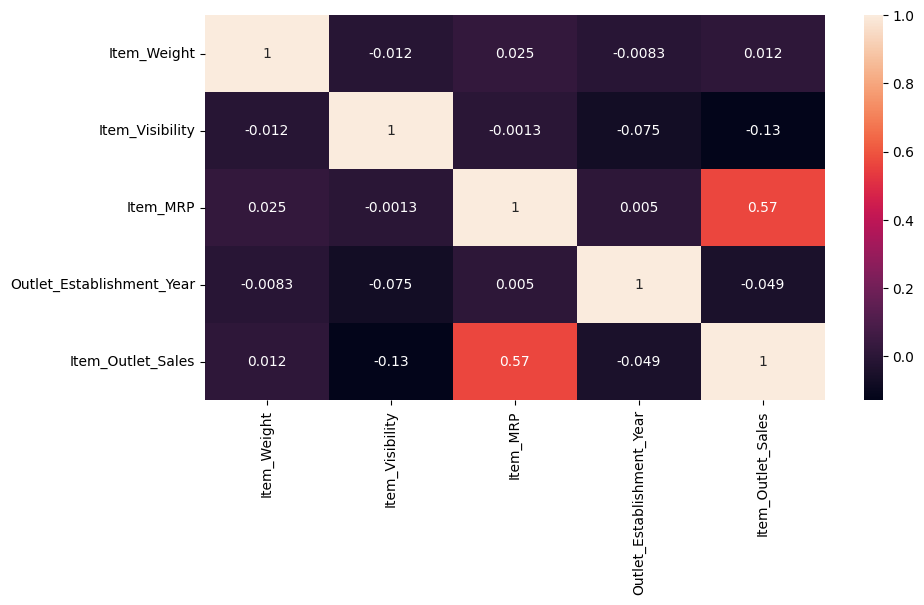

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)
plt.show() 

# EDA using Klib Library

In [27]:
import klib

In [28]:
#klib.describe - functions for visualizing datasets
klib.cat_plot(df_train) # returns a visualization of the number and frequency of categorical features


2022-10-15 22:33:29,826 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-10-15 22:33:29,924 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


GridSpec(6, 5)

2022-10-15 22:33:30,844 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-10-15 22:33:30,926 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


In [29]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


In [30]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

In [31]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature or how the data is distributed


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

In [32]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


# Data Cleaning Using klib Library

In [33]:
#klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)


Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [34]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [36]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [37]:
klib.drop_missing(df_train) # drops missing values, also called in data_cleaning()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [38]:
 klib.pool_duplicate_subsets(df_train) # pools subset of cols based on duplicates with min. loss of information

,item_visibility,item_mrp,item_outlet_sales,pooled_vars
0,0.016047,249.809204,3735.137939,0
1,0.019278,48.269199,443.422791,1
2,0.016760,141.617996,2097.270020,2
3,0.000000,182.095001,732.380005,3
4,0.000000,53.861401,994.705200,4
...,...,...,...,...
8518,0.056783,214.521805,2778.383301,8518
8519,0.046982,108.156998,549.284973,8519
8520,0.035186,85.122398,1193.113647,8520
8521,0.145221,103.133202,1845.597656,8521


In [ ]:
#klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content


# Preprocessing  before model building

#  1))Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [40]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [41]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2,1845.597656


# One Hot Encoding

In [42]:
df_train=pd.get_dummies(df_train, columns=['item_fat_content','outlet_size','outlet_location_type','outlet_type'])

In [43]:
df_train

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,...,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
0,9.300000,0.016047,4,249.809204,1999,3735.137939,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920000,0.019278,14,48.269199,2009,443.422791,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500000,0.016760,10,141.617996,1999,2097.270020,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200001,0.000000,6,182.095001,1998,732.380005,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930000,0.000000,9,53.861401,1987,994.705200,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,13,214.521805,1987,2778.383301,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380000,0.046982,0,108.156998,2002,549.284973,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600000,0.035186,8,85.122398,2004,1193.113647,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210000,0.145221,13,103.133202,2009,1845.597656,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


# Splitting our data into train and test

In [44]:
X=df_train.drop('item_outlet_sales', axis=1)

In [45]:
Y=df_train['item_outlet_sales']

In [46]:
Y


0       3735.137939
1        443.422791
2       2097.270020
3        732.380005
4        994.705200
           ...     
8518    2778.383301
8519     549.284973
8520    1193.113647
8521    1845.597656
8522     765.669983
Name: item_outlet_sales, Length: 8523, dtype: float32

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=101, test_size=0.2)

In [48]:
X_train

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,item_fat_content_4,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
3684,19.250000,0.101689,4,54.695599,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
1935,7.630000,0.061410,14,94.643600,2007,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
5142,19.350000,0.065891,10,167.081604,2007,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4978,6.380000,0.031898,4,177.434402,1997,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
2299,16.700001,0.022110,4,110.888603,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,5.000000,0.044005,14,188.852997,1997,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
5695,14.650000,0.170664,7,56.461399,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
8006,12.500000,0.018849,8,96.738403,1997,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
1361,9.695000,0.129009,0,226.940399,2007,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [49]:
X_test

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,item_fat_content_4,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
8179,11.000000,0.055163,8,100.335800,2009,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
8355,18.000000,0.038979,13,148.641800,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
3411,7.720000,0.074731,1,77.598602,1997,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7089,20.700001,0.049035,6,39.950600,2007,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
6954,7.550000,0.027225,3,152.934006,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,16.750000,0.105019,13,155.263000,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4996,8.520000,0.027059,14,153.368195,1997,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
531,15.600000,0.111686,11,184.792404,1998,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
3891,17.100000,0.000000,9,114.685997,2009,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [50]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [51]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

# Normalization

In [52]:
X.describe()

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,item_fat_content_4,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,0.066132,7.226681,140.992767,1997.831867,0.037076,0.597090,0.338965,0.013141,0.013728,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.226124,0.051598,4.209990,62.275066,8.371760,0.188960,0.490512,0.473386,0.113885,0.116365,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,4.000000,93.826500,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,6.000000,143.012802,1999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,10.000000,185.643700,2004.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,15.000000,266.888397,2009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [54]:
X_train_std=sc.fit_transform(X_train)

In [55]:
X_test_std=sc.transform(X_test)

In [56]:
X_train_std

array([[ 1.52290023,  0.68469731, -0.75847359, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.239856  , -0.09514746,  1.60759199, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 1.54667619, -0.0083859 ,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [-0.08197109, -0.91916229,  0.18795264, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-0.74888436,  1.21363045, -1.70489982, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 0.67885675,  1.83915361,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513]])

In [57]:
X_test_std

array([[-0.43860916, -0.21609253,  0.18795264, ..., -1.36686554,
         2.8659228 , -0.35759513],
       [ 1.22570184, -0.52943464,  1.37098543, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.2184578 ,  0.16277341, -1.46829326, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.65508101,  0.8782423 ,  0.89777232, ..., -1.36686554,
        -0.34892775, -0.35759513],
       [ 1.01171909, -1.28409256,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513],
       [-1.56558541, -1.09265374,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513]])

In [58]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [59]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [60]:
import joblib

In [61]:
joblib.dump(sc,r'E:\Downloads\Programming\Python\models\sc.sav')

['E:\\Downloads\\Programming\\Python\\models\\sc.sav']

# Model Building

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [63]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [64]:
Y_pred_lr=lr.predict(X_test_std)

In [65]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [66]:
X_test.head()

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,item_fat_content_4,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
8179,11.000000,0.055163,8,100.335800,2009,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
8355,18.000000,0.038979,13,148.641800,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
3411,7.720000,0.074731,1,77.598602,1997,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7089,20.700001,0.049035,6,39.950600,2007,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
6954,7.550000,0.027225,3,152.934006,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [68]:
print(r2_score(Y_test, Y_pred_lr))
print(mean_absolute_error(Y_test, Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))

0.5578538354386205
824.0187416919057
1097.7292758952885


In [69]:
joblib.dump(lr,r'E:\Downloads\Programming\Python\models\rf.sav')

['E:\\Downloads\\Programming\\Python\\models\\rf.sav']

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [71]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [72]:
Y_pred_rf= rf.predict(X_test_std)

In [73]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5491470915661386
782.2308307812419
1108.4848288703422


# Hyper Parameter Tuning

In [74]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.520 (0.008) with: {'n_estimators': 10}
0.545 (0.007) with: {'n_estimators': 100}
0.550 (0.006) with: {'n_estimators': 1000}


In [75]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [76]:
grid_search_forest.best_score_

0.5501856875913211

In [77]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [78]:
r2_score(Y_test,Y_pred_rf_grid)

0.5507461595429964

# Save Model

In [79]:
import joblib

In [80]:
joblib.dump(grid_search_forest,r'C:\Users\tazri\Model\random_forest_grid.sav')

['C:\\Users\\tazri\\Model\\random_forest_grid.sav']

In [81]:
model=joblib.load(r'C:\Users\tazri\Model\random_forest_grid.sav')

In [82]:
model.predict(X_test_std)

array([1704.28621185, 3545.10064401, 1280.55712207, ...,  375.38136839,
       1681.04580743, 2413.69081366])